# Frecuencia de Palabras

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [2]:
# Clase para encontrar palabras comunes en los abstracts
class MostCommonWords:
    def __init__(self, df):
        self.df = df
    
    def find_most_common_words(self, n=1000):
        # Obtener los abstracts como una lista de strings
        abstracts = self.df['Abstract'].tolist()
        
        # Inicializar CountVectorizer
        vectorizer = CountVectorizer()
        
        # Ajustar y transformar los abstracts
        X = vectorizer.fit_transform(abstracts)
        
        # Obtener el vocabulario del CountVectorizer
        vocabulary = vectorizer.get_feature_names_out()
        
        # Obtener las frecuencias de las palabras
        word_frequencies = zip(vocabulary, X.sum(axis=0).tolist()[0])
        
        # Ordenar las palabras por frecuencia
        sorted_words = sorted(word_frequencies, key=lambda x: x[1], reverse=True)
        
        # Obtener las palabras más comunes
        most_common_words = sorted_words[:n]
        
        return most_common_words

In [3]:
# Cargar el DataFrame df_definitivo desde el archivo CSV
df_definitivo = pd.read_csv('BehavioralFinance_def.csv')

# Crear una instancia de la clase MostCommonWords
most_common_analyzer = MostCommonWords(df_definitivo)

In [6]:
# Encontrar las palabras más comunes
most_common_words = most_common_analyzer.find_most_common_words(n=1000)
print("Las 1000 palabras más comunes son:")
for word, frequency in most_common_words:
    print(f"{word}: {frequency}")

# Guardar los resultados en un archivo CSV
df_palabras_comunes = pd.DataFrame(most_common_words, columns=['Palabra', 'Frecuencia'])
df_palabras_comunes.to_csv('BehavioralFinancepalabras_comunes.csv', index=False)

Las 1000 palabras más comunes son:
the: 27364
of: 17133
and: 15784
to: 10294
in: 9406
that: 4655
is: 4277
on: 4269
this: 3896
behavioral: 3692
for: 3509
finance: 3302
by: 2656
financial: 2638
as: 2631
with: 2597
are: 2408
market: 2181
we: 2079
from: 1917
study: 1882
investors: 1835
an: 1690
research: 1610
stock: 1532
their: 1369
it: 1287
be: 1252
investment: 1247
behavior: 1240
have: 1224
risk: 1219
based: 1175
has: 1164
model: 1156
paper: 1148
which: 1107
results: 1080
between: 1058
data: 1048
can: 1032
more: 1022
investor: 988
or: 961
not: 951
analysis: 944
theory: 941
these: 899
information: 890
decision: 887
using: 865
also: 843
was: 815
were: 806
factors: 790
findings: 762
effect: 755
sentiment: 755
decisions: 741
making: 736
such: 726
social: 715
markets: 704
all: 703
impact: 681
at: 663
how: 661
approach: 638
returns: 628
use: 619
economic: 598
biases: 594
influence: 594
they: 585
our: 583
literature: 579
health: 575
studies: 574
time: 573
other: 563
different: 557
value: 554
in

In [7]:
# Cargar el archivo CSV con las palabras comunes
archivo_palabras_comunes = 'BehavioralFinancepalabras_comunes.csv'
df_palabras_comunes = pd.read_csv(archivo_palabras_comunes)

# Obtener las 60 primeras palabras más comunes y sus frecuencias
palabras_mas_comunes = df_palabras_comunes['Palabra'].head(60)
frecuencias = df_palabras_comunes['Frecuencia'].head(60)

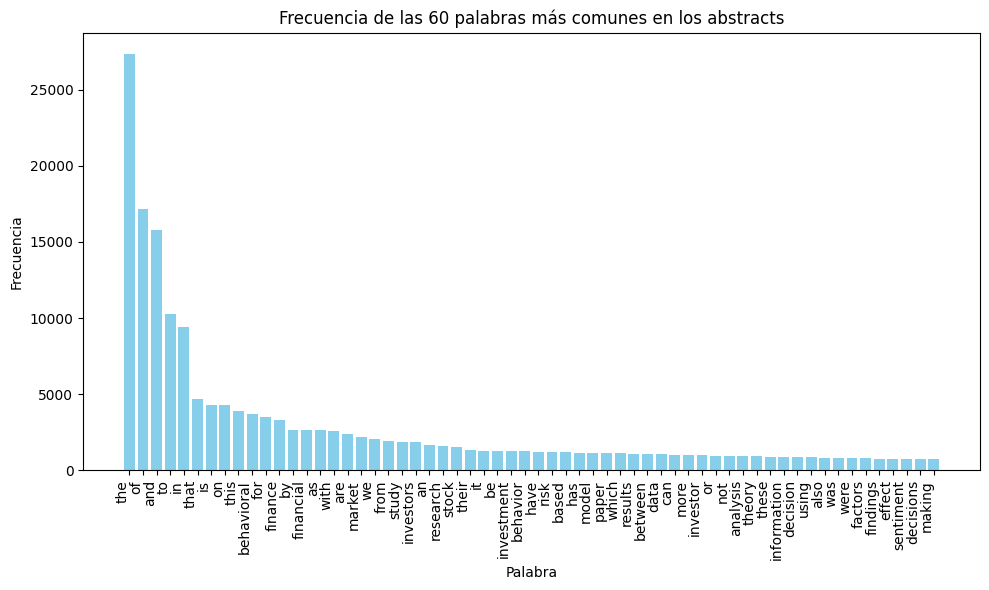

In [8]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(palabras_mas_comunes, frecuencias, color='skyblue')

# Añadir título y etiquetas
plt.title('Frecuencia de las 60 palabras más comunes en los abstracts')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()